In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [9]:
%matplotlib inline

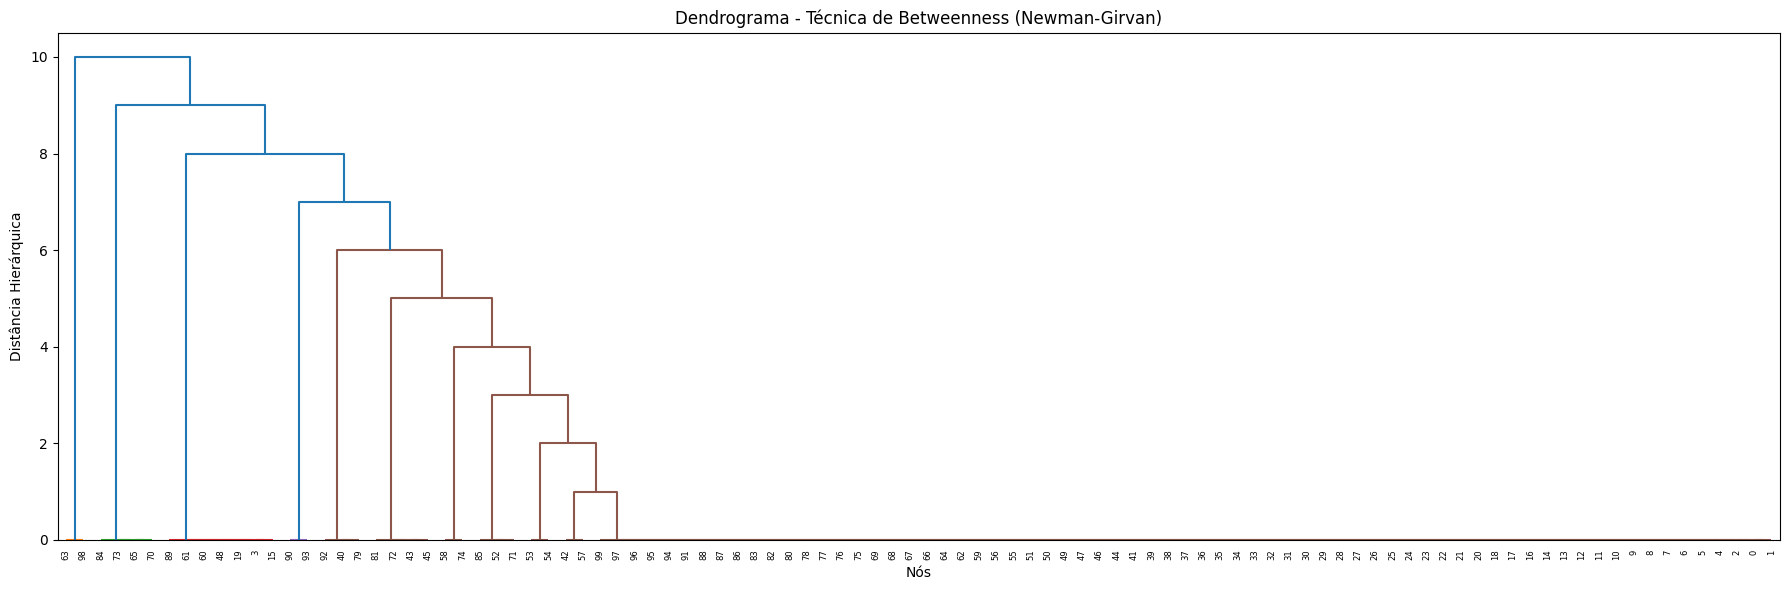

In [12]:
# Carrega a rede
edges = []
with open('scale_free_network.txt') as f:
    for line in f:
        if line.strip():
            u, v = map(int, line.strip().split())
            edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# Aplica Girvan-Newman
comp_gen = girvan_newman(G)

# Coleta os primeiros 10 níveis de comunidades
levels = []
for i, communities in enumerate(comp_gen):
    sorted_comms = tuple(sorted(c) for c in communities)
    levels.append(sorted_comms)
    if i == 9:  # limite razoável para o dendrograma
        break

# Gera matriz de distância com base nas divisões
nodes = sorted(G.nodes())
node_index = {node: idx for idx, node in enumerate(nodes)}
n = len(nodes)
distance_matrix = np.zeros((n, n))

for comms in levels:
    label = {}
    for i, group in enumerate(comms):
        for node in group:
            label[node] = i
    for i in range(n):
        for j in range(i + 1, n):
            if label[nodes[i]] != label[nodes[j]]:
                distance_matrix[i, j] += 1
                distance_matrix[j, i] += 1

# Condensa a matriz e cria dendrograma
condensed_distance = distance_matrix[np.triu_indices(n, k=1)]
Z = linkage(condensed_distance, method='average')

plt.figure(figsize=(18, 6))
dendrogram(Z, labels=nodes, leaf_rotation=90, leaf_font_size=6)
plt.title("Dendrograma - Técnica de Betweenness (Newman-Girvan)")
plt.xlabel("Nós")
plt.ylabel("Distância Hierárquica")
plt.tight_layout()
plt.show()